# **Credit Card Fraud Detection**

### Classification Dataset
### Model Built:- Logistic Regression, SVC, Random forest
### Reference :- https://www.kaggle.com/code/pavansanagapati/automated-hyperparameter-tuning

## Importing Libraries

In [1]:

!pip install skimpy
!pip install summarytools
!pip install polars

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.1/117.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.5 MB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.29.4 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
data= pd.read_csv("creditcard.csv")

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


## Summary of data and Basic Checks

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,73377.0,35585.573872,14672.723434,0.000000,29408.000000,38645.000000,46739.000000,55107.000000
V1,73377.0,-0.253191,1.880796,-56.407510,-1.012767,-0.246674,1.153498,1.960497
V2,73377.0,-0.026959,1.665003,-72.715728,-0.594981,0.071742,0.726269,18.902453
V3,73377.0,0.678866,1.408884,-33.680984,0.191359,0.767744,1.400254,4.226108
V4,73377.0,0.168021,1.372497,-5.172595,-0.725068,0.187161,1.052199,16.715537
V5,73377.0,-0.272388,1.387707,-42.147898,-0.890076,-0.304873,0.265093,34.801666
V6,73377.0,0.098351,1.304997,-26.160506,-0.639160,-0.152364,0.492396,22.529298
V7,73377.0,-0.113787,1.252286,-31.764946,-0.604468,-0.073795,0.420147,36.677268
V8,73377.0,0.055719,1.234504,-73.216718,-0.141902,0.067809,0.347037,20.007208
V9,73377.0,0.009983,1.155997,-9.283925,-0.676331,-0.075887,0.655599,10.392889


In [3]:
import polars as pl
from summarytools import dfSummary
from skimpy import skim

In [ ]:
dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Time[int64],Mean (sd) : 12121.2 (8982.3)min < med < max:0.0 < 10980.0 < 27371.0IQR (CV) : 16988.0 (1.3),"10,850 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC1ElEQVR4nO3cPW/aQBjA8edKQEdQbfGisPEFInWIlIWlW8d+2K7dOiRSZ74BC4qEHBA0CPPSpVSVSoJ9x5V73P9vjk2Gvzgb+x6z3+8FiN27S/8DQBFXp/7AGNMUkYbj+df7/f7F8VjgtzdDNcY0u93u5yRJ2i4nn8/nmTHmC7HC16lv1EaSJO3hcPiSpumqzIlns5l9eHhoT6fThogQKrycXPpFRNI0Xd3c3PxwOH/T4RjgL9xMQQVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoUOg1P1fb7bYuIokxxvUU7BCAiAQMdblc1vM8/zAYDGq1Wq3US9cH7BDAQbBQ1+v1lbX2+u7ubtXv97Oyx7NDAH8KuvSLiLRaLdfdASLsEMAv3ExBBUKFCsGXfvw/Qs6AIFScRegZEISKcwk6A4JQcVahZkBwMwUVCBUqECpUIFSoQKhQgVChAqFCBX5HfQUj4eNCqEcwEj4+hHqc2pHwVV0JCPUN2kbC+64Ez8/PC2PMVxFx2TqU7Ha7usvnFkGo1eK8Ekwmk/ePj48fB4NBz2WPW57ndrvd3q5Wq28i4rqj41WEWkEuK0GWZU2fPW7j8bg9Go2uN5tNreyxRVQ2VM9rtaDLWMxc97hlWRb0cifqUD3mAthOp/MpTdOWy+eGXsZQXrSh+swFyPPcisjt/f39916vNy/72aGXMZQXbag+cwEOoVlr8xiXMZQXbagHLtdMhFY9POuHCtF/o2rkORwu2qdDl0SoZ+Y7HI73BI4j1DPzuQm89HsCMSPUQDyGw3EjeAShRsbz+rayT9QINSK+17dVfqJGqBHxHX5c5SdqhBqhWF8MuSR+8IcKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCj0UspsNrNlT7xYLKyIyHK5tE9PT9f/8nitn631//Y9vkhfPwEkB57UA++znAAAAABJRU5ErkJggg=="">",0(0.0%)
2,V1[float64],Mean (sd) : -0.3 (1.8)min < med < max:-28.3 < -0.3 < 2.0IQR (CV) : 2.1 (-0.1),"15,443 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACA0lEQVR4nO3dTW6bUBSG4XP7Q8Gx7hVCZRORvAAWkcV2CR14BZ565BmyZWHZMYl/6KBqlAySFDBNP+t9pnDkM3iFhHwlXNM0BvzvPn30AsDf+PLRC+B6OOcSM4s6jj82TbN/7SKh4iKcc0mWZXfe+7TL/GazWTvnfrwWK6HiUiLvfVoUxT6EULcZrKoqnk6n6Wq1isyMUDG8EEKd5/l9h9HkrYu8TEECoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICn0HHE+dcYmZRx3F/Pp+/XnKf5wgVZvY70izL7rz3aZf5w+EQn06n27quf5rZ/YXXI1Q8ibz3aVEU+xBC3XZ4sViks9lsdDwePw+xHKHihRBCned56yfier1OhtjnD16mIIFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYH/+q9Mj6N6gx7T64tQr0ifo3pDH9Pr691QnXOxmX37B7ugPz8ej79PJpNjkiQPbQaXy2U8n89HVVXdlGX52PaHt9ttbGa22+3isixHbWarqorfu+cXbHNody/7lvAAAAAASUVORK5CYII="">",0(0.0%)
3,V2[float64],Mean (sd) : 0.3 (1.5)min < med < max:-41.0 < 0.2 < 14.6IQR (CV) : 1.2 (0.2),"15,443 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB4UlEQVR4nO3XTU7CUBSG4XNEkSrehjQyZAMmLIBFuFinzhywC+aEQKTESKWW69gYf9rUwEfeZ/7lnsE7uR5jNODYnR36AOAvzg99ANrl7omZdRvOdzHGbZv3tIVQT4i7J1mW3YcQBk32m83m2d0fjjFWQj0t3RDCYDKZbNM0LeoM8zzvTafTwWq16poZoeL/pWlaDIfD1wbTpPVjWsJnChIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRLOD30APnP3xMy6Dedhv99ftHnPsSDUI+LuSZZl9yGEQZN9WZa9qqruiqJ4MrPXuvuqqi7MLLh7k+fNzHYxxm3T8U9+DdXde2Z2+R+P44vQ7/dvx+Pxe5Ikb3XHy+WyN5vNrvI8v14sFrs62/l8flOW5Xg0GnU6nU5R920zs/V6/eLuj2bWZP8WY/x29wFtzVeJOxGN+gAAAABJRU5ErkJggg=="">",0(0.0%)
4,V3[float64],Mean (sd) : 0.8 (1.7)min < med < max:-27.4 < 0.9 < 4.1IQR (CV) : 1.2 (0.5),"15,443 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB+klEQVR4nO3YQW7aYBCG4Zk2BZtav2VZ5RKROIAPkcP2CFlwAras2FkgZASJG2PcVSt1QVIbUvpF77O1B8/i1SzwrusM+N99uvUCwN+4u/UC+DjcPTaz0cDxl67rns89JFRchbvHeZ4/hBCyIfO73W7r7t/PxUqo+O3CixiSJJkWRbFL07TuM1hVVTSfz7PNZjMyM0LFeZdexKZporZt78fj8e

In [ ]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 15936  │ │ float64     │ 30    │                                                          │
│ │ Number of columns │ 31     │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name ┃ NA ┃ NA % ┃ mean      ┃ sd      ┃ p0     ┃ p25       ┃ p50       ┃ p75      ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Time        │  0 │    0 │     12120 │    8982 │      0 │      3634 │     10980 │    20620 │ 27370 │ ▇▃▃▂▃▅ │  │
│ │ V1          │  0 │    0 │   -0.2543 │   1.843 │ -28.34 │   -0.9708 │   -0.3185 │    1.162 │  1.96 │      ▇ │  │
│ │ V2          │  0 │    0 │    0.2772 │   1.491 │ -40.98 │   -0.2865 │    0.2474 │   0.8847 │  14.6 │     ▇  │  │
│ │ V3          │  0 │    0 │    0.8039 │   1.704 │ -27.37 │    0.3717 │    0.9418 │    1.576 │ 4.102 │      ▇ │  │
│ │ V4          │  0 │    0 │    0.3013 │   1.492 │ -5.173 │   -0.6212 │    0.2314 │     1.18 │ 11.93 │   ▇▆   │  │
│ │ V5          │  0 │    0 │   -0.1305 │   1.382 │ -32.09 │   -0.7125 │   -0.1862 │   0.3522 │  34.1 │    ▇▁  │  │
│ │ V6          │  0 │    0 │    0.1126 │   1.329 │  -23.5 │    -0.639 │   -0.1608 │   0.5018 │ 21.39 │    ▁▇  │  │
│ │ V7          │  0 │    0 │   -0.1504 │   1.322 │ -26.55 │   -0.6008 │   -0.0847 │     0.44 │  34.3 │    ▇   │  │
│ │ V8          │  0 │    0 │ 0.0006871 │   1.304 │ -23.63 │   -0.1792 │   0.01747 │   0.2662 │ 17.05 │     ▇  │  │
│ │ V9          │  0 │    0 │    0.8608 │   1.254 │ -7.175 │   0.06709 │    0.8519 │    1.568 │ 10.39 │    ▇▃  │  │
│ │ V10         │  0 │    0 │   -0.2879 │   1.263 │ -14.17 │   -0.7449 │   -0.3522 │   0.1541 │  12.7 │    ▃▇  │  │
│ │ V11         │  0 │    0 │    0.8035 │     1.2 │ -2.767 │ -0.007598 │    0.7536 │    1.594 │ 12.02 │  ▂▇▁   │  │
│ │ V12         │  0 │    0 │    -1.387 │   1.575 │ -17.77 │    -2.403 │    -1.708 │ -0.04395 │ 3.775 │     ▇▂ │  │
│ │ V13         │  0 │    0 │      0.89 │   1.181 │  -3.39 │   0.04566 │    0.9522 │    1.778 │ 4.465 │  ▂▆▇▅  │  │
│ │ V14         │  0 │    0 │     0.729 │   1.358 │ -19.21 │    0.1221 │    0.9849 │    1.512 │ 7.692 │     ▇  │  │
│ │ V15         │  0 │    0 │   -0.1354 │  0.9793 │ -4.153 │   -0.7028 │ -0.001974 │    0.529 │ 3.635 │  ▁▅▇▁  │  │
│ │ V16         │  0 │    0 │  -0.03341 │  0.9714 │ -12.23 │   -0.5105 │     0.044 │   0.5378 │ 4.816 │    ▁▇  │  │
│ │ V17         │  0 │    0 │    0.3607 │   1.268 │ -18.59 │    -0.117 │    0.3617 │   0.8518 │ 9.254 │    ▃▇  │  │
│ │ V18         │  0 │    0 │  -0.02218 │  0.8557 │ -8.061 │   -0.4599 │   0.02685 │   0.4791 │ 4.296 │    ▇▆  │  │
│ │ V19         │  0 │    0 │  -0.08294 │  0.8259 │ -4.933 │   -0.5689 │  -0.08768 │   0.4331 │ 4.555 │   ▆▇▁  │  │
│ │ V20         │  0 │    0 │   0.03113 │  0.6171 │ -13.28 │   -0.1608 │  -0.03437 │   0.1451 │ 13.85 │    ▇▁  │  │
│ │ V21         │  0 │    0 │  -0.06175 │  0.8555 │ -11.47 │   -0.2688 │   -0.1272 │  0.02723 │ 22.61 │   ▇▇   │  │
│ │ V22         │  0 │    0 │   -0.1623 │  0.6246 │ -8.5

In [ ]:
# Removing Dupicates value
data.drop_duplicates(inplace=True)

In [ ]:
# Removing NAN values
data.dropna(inplace=True)

In [ ]:
data.shape

(73094, 31)

# EDA

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

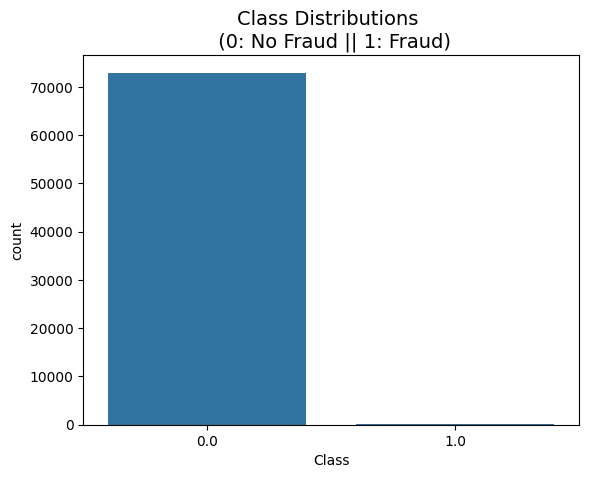

In [ ]:
sns.countplot(x='Class',data = data)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [ ]:
df = data[['Amount','Class']].copy()
class_0 = df.loc[df['Class'] == 0]['Amount']
class_1 = df.loc[df['Class'] == 1]['Amount']

In [ ]:
#Summary of No Fraud
class_0.describe()

count    72916.000000
mean        97.506622
std        270.725658
min          0.000000
25%          7.690000
50%         26.880000
75%         89.000000
max      19656.530000
Name: Amount, dtype: float64

In [ ]:
# Summary of Fraud
class_1.describe()

count     178.000000
mean       95.191461
std       218.660540
min         0.000000
25%         1.000000
50%         7.595000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
# Model Building and Model Evaluatiom
X = data.drop("Class", axis=1)
y = data['Class']

In [ ]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
#Spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

y_train.value_counts()

Class
0.0    58330
1.0      145
Name: count, dtype: int64

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)

X_train, y_train = smote.fit_resample(X_train,y_train)
X_test, y_test = smote.fit_resample(X_test,y_test)

In [ ]:
y_train.value_counts()

Class
0.0    58330
1.0    58330
Name: count, dtype: int64

In [ ]:
from collections import Counter
Counter(y_train)

Counter({0.0: 58330, 1.0: 58330})

In [ ]:
Counter(y_test)

Counter({0.0: 14586, 1.0: 14586})

# Model Creation

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score, precision_score,classification_report,f1_score

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[14249   337]
 [ 1257 13329]]


In [ ]:
pd.crosstab(y_test,y_pred)

col_0,0.0,1.0
Class,,
0.0,14249,337
1.0,1257,13329


In [ ]:
print("accuracy_score: ",accuracy_score(y_test,y_pred))
print("recall_score: ",recall_score(y_test,y_pred))
print("precision_score: ",precision_score(y_test,y_pred))
print("f1_score: ",f1_score(y_test,y_pred))

accuracy_score:  0.9453585630056218
recall_score:  0.913821472645002
precision_score:  0.9753402605005123
f1_score:  0.9435792156307519


# SVC

In [ ]:
# Algorithm
from sklearn.svm import SVC

model = SVC()

model.fit(X_train,y_train)

SVC()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 1., 1., 1.])

In [ ]:
print("accuracy_score: ",accuracy_score(y_test,y_pred))
print("recall_score: ",recall_score(y_test,y_pred))
print("precision_score: ",precision_score(y_test,y_pred))
print("f1_score: ",f1_score(y_test,y_pred))

accuracy_score:  0.9675716440422323
recall_score:  0.9558480734951323
precision_score:  0.9787980904240382
f1_score:  0.9671869580298301


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RFR = RandomForestRegressor(n_estimators=100, random_state=1)
RFR.fit(X_train, y_train)
rf_preds = RFR.predict(X_test)

In [ ]:
print("accuracy_score: ",accuracy_score(y_test,rf_preds))
print("recall_score: ",recall_score(y_test,rf_preds))
print("precision_score: ",precision_score(y_test,rf_preds))
print("f1_score: ",f1_score(y_test,rf_preds))

accuracy_score:  0.9675716440422323
recall_score:  0.9558480734951323
precision_score:  0.9787980904240382
f1_score:  0.9671869580298301


In [ ]:
#Plotting AUc and roc

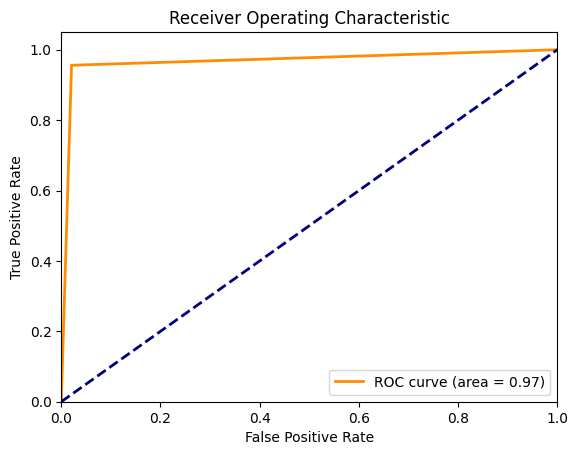

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have your true labels (y_true) and predicted probabilities (y_scores)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#AUC score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.9675716440422323